# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

## Perform API Calls

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|fonte boa
Processing record 2|punta arenas
Processing record 3|barrow
Processing record 4|meulaboh
City not found. skipping.
Processing record 5|kisanga
Processing record 6|bani
Processing record 7|hilo
Processing record 8|yvetot
Processing record 9|laguna
Processing record 10|moron
Processing record 11|carnarvon
Processing record 12|kaitangata
Processing record 13|nuevo progreso
Processing record 14|jamestown
Processing record 15|synya
Processing record 16|pangnirtung
Processing record 17|rikitea
Processing record 18|puerto ayora
Processing record 19|carauari
Processing record 20|souillac
Processing record 21|cape town
Processing record 22|albany
Processing record 23|chokurdakh
City not found. skipping.
Processing record 24|vaini
City not found. skipping.
Processing record 25|opuwo
Processing record 26|zhangye
Processing record 27|kodiak
Processing record 28|kutum
Processing record 29|petropavlovsk-kamchatskiy
Processing record 30|mataura
City not found. skipping.


Processing record 242|puga
Processing record 243|mercedes
Processing record 244|impfondo
City not found. skipping.
Processing record 245|lorengau
Processing record 246|surt
City not found. skipping.
Processing record 247|snezhnogorsk
City not found. skipping.
Processing record 248|mocuba
Processing record 249|lagoa
Processing record 250|pacific grove
Processing record 251|kaeo
Processing record 252|bjerringbro
Processing record 253|lebu
Processing record 254|surab
City not found. skipping.
Processing record 255|vila franca do campo
Processing record 256|kibungo
Processing record 257|tiksi
Processing record 258|lavrentiya
Processing record 259|mandurah
Processing record 260|atalaya
Processing record 261|placido de castro
Processing record 262|narrabri
Processing record 263|iqaluit
Processing record 264|cayenne
Processing record 265|thinadhoo
Processing record 266|luleburgaz
City not found. skipping.
Processing record 267|diamantino
Processing record 268|kodinsk
Processing record 269|man

Processing record 482|acapulco
Processing record 483|ambon
Processing record 484|muisne
City not found. skipping.
Processing record 485|lar
Processing record 486|skibbereen
Processing record 487|yokadouma
Processing record 488|strezhevoy
Processing record 489|vaitape
City not found. skipping.
Processing record 490|benoy
Processing record 491|palu
Processing record 492|joshimath
Processing record 493|porangatu
Processing record 494|kalianget
City not found. skipping.
City not found. skipping.
Processing record 495|baoshan
Processing record 496|cockburn town
Processing record 497|dunedin
City not found. skipping.
Processing record 498|kovur
Processing record 499|lao cai
Processing record 500|bama
Processing record 501|elliot lake
Processing record 502|asbury park
Processing record 503|muskegon
Processing record 504|marsh harbour
Processing record 505|daru
Processing record 506|gazimurskiy zavod
Processing record 507|barguzin
City not found. skipping.
Processing record 508|bellegarde-sur-

In [4]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("city.csv")

In [5]:
# Display the City Data Frame
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Fonte Boa,0,BR,1570594589,79,-2.51,-66.09,78.73,4.43
1,Punta Arenas,90,CL,1570594589,80,-53.16,-70.91,41.00,29.97
2,Barrow,27,AR,1570594590,56,-38.31,-60.23,45.93,6.55
3,Meulaboh,83,ID,1570594590,79,4.14,96.13,79.28,3.78
4,Kisanga,55,CD,1570594590,72,-11.72,27.40,62.33,3.58


## Latitude vs. Temperature Plot

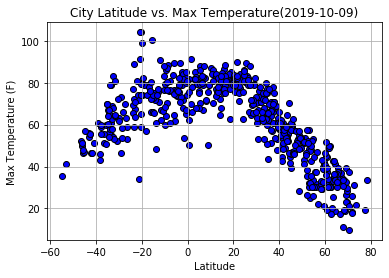

In [6]:
#Converting Date for title of plot
timestamp = city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({shortened_timestamp})")
plt.savefig("output_data/Lat_vs_temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

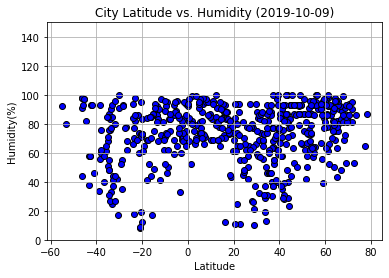

In [7]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("output_data/Lat_vs_humidity_plot")
plt.show()

## Latitude vs. Cloudiness Plot

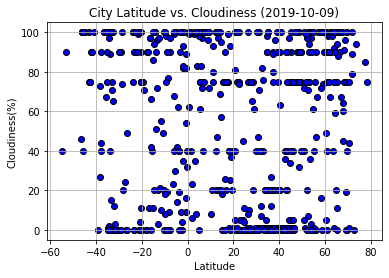

In [8]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("output_data/Lat_vs_cloudiness_plot")
plt.show()

## Latitude vs. Wind Speed Plot

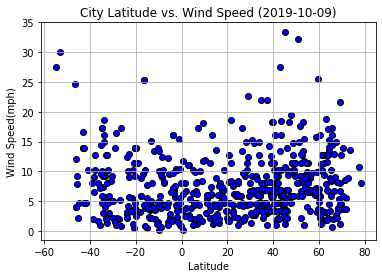

In [9]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("output_data/Lat_vs_windSpeed_plot")
plt.show()

## Linear Regression

In [10]:
# Create a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

###  Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8816013646532813


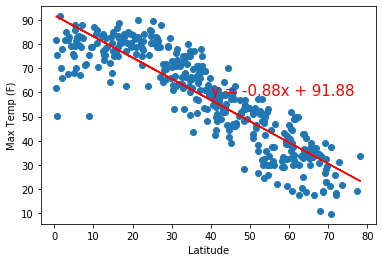

None


In [12]:
# Linear regression on Northern Hemisphere
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.6325853941996927


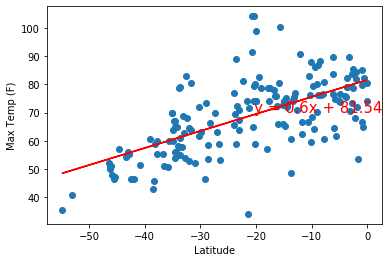

None


In [13]:
# Linear regression on Southern Hemisphere
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10862189102329134


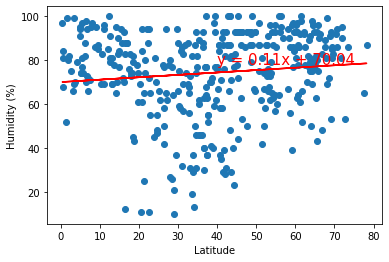

None


In [14]:
# Northern Hemisphere
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.15066036210615993


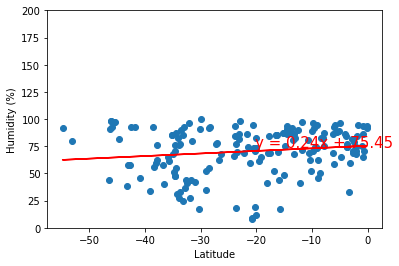

None


In [15]:
# Southern Hemisphere
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10801533277160548


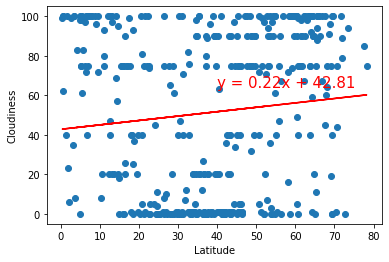

None


In [16]:
# Northern Hemisphere
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.08871290082555164


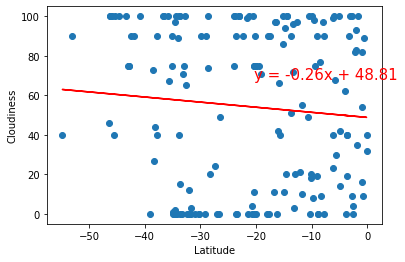

None


In [17]:
# Southern Hemisphere
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2032768781751069


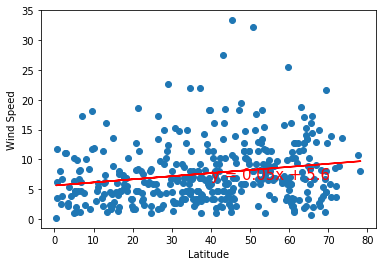

None


In [18]:
# Northern Hemisphere
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.25410634456015696


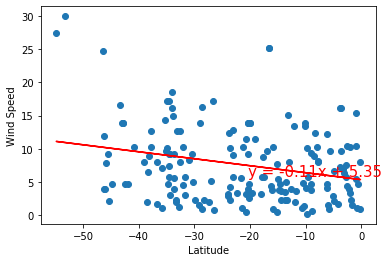

None


In [19]:
# Southern Hemisphere
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.